













# Project: Wrangling and Analyze Data

In [56]:
#importing necessary libraries
import pandas as pd
import requests
from matplotlib import pyplot as plt
import seaborn as sns
import json
% matplotlib inline


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [57]:
wr_df=pd.read_csv("twitter-archive-enhanced.csv")
wr_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [58]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(r.content)

335079

In [59]:
import requests
image_url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
  
# URL of the image to be downloaded is defined as image_url
r = requests.get(image_url) # create HTTP response object
  
# send a HTTP request to the server and save
# the HTTP response in a response object called r
with open("image_predictions_tsv",'wb') as f:
  
    # Saving received content as a png file in binary
  # write the contents of the response (r.content)to a new file in binary mode.
    f.write(r.content)

In [60]:
image_pred_df=pd.read_csv("image_predictions_tsv",sep="\t")
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [61]:
#function to load the twitter api file and put into a data frame
def wrangle(filename):
    #opening the compressed file
    tweets = []
    for line in open(filename, 'r'):
        tweets.append(json.loads(line))
       #turning dict to a data frame 
        df=pd.DataFrame(tweets)
    
    return df

In [62]:
df_tweets=wrangle("tweet-json.txt")
df_tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [63]:
print (wr_df.info())
print (wr_df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [64]:
wr_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1922,674255168825880576,NaN,NaN,2015-12-08 15:52:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bobbay. He's a marshmallow wizard...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674255168...,10,10,Bobbay,None,None,None,None
1935,674008982932058114,NaN,NaN,2015-12-07 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup is sad bc he didn't get to be the toy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674008982...,10,10,None,None,None,None,None
1487,693095443459342336,NaN,NaN,2016-01-29 15:36:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. He doesn't understand your fancy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693095443...,10,10,Milo,None,None,pupper,None
47,883117836046086144,NaN,NaN,2017-07-07 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883117836...,13,10,None,None,None,None,None


In [65]:
wr_df["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [66]:
wr_df["rating_numerator"].value_counts().head(15)

12     558
11     464
10     461
13     351
9      158
8      102
7       55
14      54
5       37
6       32
3       19
4       17
1        9
2        9
420      2
Name: rating_numerator, dtype: int64

In [67]:
wr_df["rating_denominator"].value_counts().head(10)

10    2333
11       3
50       3
80       2
20       2
2        1
16       1
40       1
70       1
15       1
Name: rating_denominator, dtype: int64

In [68]:
wr_df["name"].value_counts().head(10)

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Lola        10
Tucker      10
Penny       10
Winston      9
Name: name, dtype: int64

In [69]:
wr_df["floofer"].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [70]:
wr_df["doggo"].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [71]:
wr_df["pupper"].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [72]:
image_pred_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
599,679729593985699840,https://pbs.twimg.com/media/CW7iddWUsAElUC0.jpg,1,wallaby,0.164215,False,West_Highland_white_terrier,0.093515,True,ashcan,0.067278,False
611,680115823365742593,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,1,pug,0.999365,True,French_bulldog,0.000544,True,Boston_bull,0.000028,True
466,675015141583413248,https://pbs.twimg.com/media/CV4iqh5WcAEV1E6.jpg,1,street_sign,0.290091,False,golden_retriever,0.258372,True,sandbar,0.132173,False
1457,777684233540206592,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
1418,771380798096281600,https://pbs.twimg.com/media/CrR-vVfXEAAk6Gg.jpg,1,collie,0.503728,True,Border_collie,0.450944,True,English_springer,0.012693,True


In [73]:
print (image_pred_df.info())
print (image_pred_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None
(2075, 12)


In [74]:
image_pred_df["img_num"].head(2)

0    1
1    1
Name: img_num, dtype: int64

In [75]:
image_pred_df["tweet_id"].head(2)

0    666020888022790149
1    666029285002620928
Name: tweet_id, dtype: int64

In [76]:
image_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [77]:
print (df_tweets.info())
print (df_tweets.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [78]:
df_tweets.isna().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

## Assessing Data




### Quality issues
####  wr_df
1.The name column has 745 values named none and 55 values named 'a' which is quite weird

2.The rating_denominator values should all be the same.Only 233 is divided by 10.

3.Missing values in some columns e.g in_reply_to_status_id, in_reply_to_user_id

4.We dont need the data provided in the following columns: retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp since we dont need the retweets

5.420 is quite high for a rate out of 10,thats an outlier
 #### image_pred_df
6.The img_num column has to be eliminated since its of no use
 #### df_tweets
7.The data frame has many null values that need to be dropped

8.Some columns need to be dropped since they are not useful to our analysis e.g in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str


### Tidiness issues
1.Columns doggo, floofer, pupper and puppo are in different columns

2.jpg_url variable should be in tw_arc table to satisfy tidiness definition

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [79]:
# Make copies of original pieces of data
wr_cleaned=wr_df.copy()
tweets_cleaned=df_tweets.copy()
image_cleaned=image_pred_df.copy()

### Issue #1: CHANGING THE 'A' AND NONE VALUES TO NaN

#### Define:
Using numpy to change the values

#### Code

In [80]:
import numpy as np

wr_cleaned.name.replace(['None', 'a'], np.nan, inplace=True)


#### Test

In [81]:
wr_cleaned["name"].head()

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object

### Issue #2:THE RATING DENOMINATOR HAS TO BE CONSISTENT AND ELIMINATING OUTLIERS IN THE RATING NUMERATOR

#### Define
The rating denominator has to be 10 allthrough while the maximum numerator will be changed to 14

#### Code


In [82]:
wr_cleaned["rating_denominator"]=10

In [83]:

wr_cleaned.loc[wr_cleaned['rating_numerator']>14, 'rating_numerator'] = 14

#### Test

In [84]:
wr_cleaned["rating_denominator"].value_counts()

10    2356
Name: rating_denominator, dtype: int64

In [85]:
wr_cleaned["rating_numerator"].value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
14     82
7      55
5      37
6      32
3      19
4      17
1       9
2       9
0       2
Name: rating_numerator, dtype: int64

### Issue #3: Many of the  df_tweets  columns are unnecessary
#### Define: Grouping by the columns and creating  a new data frame
##### Code

In [86]:
tweets_api_df=df_tweets.groupby("id", as_index = False)[
                       ["favorite_count","retweet_count"]].mean().sort_values(by="favorite_count",ascending=False)

In [87]:
tweets_api_df.rename(columns={"id":"tweet_id"},inplace=True)

In [88]:
tweets_api_df=tweets_api_df.set_index("tweet_id")

### Test

In [89]:
tweets_api_df.head()

,favorite_count,retweet_count
tweet_id,,
822872901745569793,132810,48265
744234799360020481,131075,79515
879415818425184262,107956,45849
807106840509214720,107015,56625
866450705531457537,106827,32883


## ISSUE 4 COMBINING THE DOG COLUMNS
### define ; we shall use the melt function

In [92]:
# replace “None” with “” in each column
for x in ["doggo", "floofer", "pupper", "puppo"]:
    wr_cleaned[x].replace("None", " ", inplace = True)
#Add the four string columns together to create one column called dog_type
wr_cleaned['dog_type'] = wr_cleaned['doggo'] + wr_cleaned[
 'floofer']+ wr_cleaned['pupper'] + wr_cleaned['puppo']
wr_cleaned.dog_type.value_counts()

                  1976
  pupper           245
doggo               83
   puppo            29
doggo pupper        12
 floofer             9
doggo  puppo         1
doggofloofer         1
Name: dog_type, dtype: int64

In [94]:
dogs = wr_cleaned[['tweet_id', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'rating_numerator', 'rating_denominator']].copy()
tweets = wr_cleaned.drop(['name', 'doggo', 'floofer', 'pupper', 'puppo', 'rating_numerator', 'rating_denominator'], axis=1)

In [95]:
def u(row):
    if row ['doggo'] == 'None' and row ['floofer'] == 'None' and row ['pupper'] == 'None' and row ['puppo'] == 'None':
        val = 'unknown'
    else:
        val ='None'
    return val

dogs['unknown'] = dogs.apply(u, axis=1)

In [96]:
dogs = pd.melt(dogs, id_vars =['tweet_id', 'name', 'rating_numerator','rating_denominator'],
                     value_vars = ['doggo', 'floofer', 'pupper', 'puppo', 'unknown'],
                     var_name = 'dog_stage', 
                    value_name = 'value')

In [97]:
dogs = dogs[dogs['value']!= 'None']
dogs = dogs.drop('value', axis=1)

### TEST

In [98]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9424 entries, 0 to 9423
Data columns (total 5 columns):
tweet_id              9424 non-null int64
name                  6224 non-null object
rating_numerator      9424 non-null int64
rating_denominator    9424 non-null int64
dog_stage             9424 non-null object
dtypes: int64(3), object(2)
memory usage: 441.8+ KB


In [100]:
df=pd.merge(dogs,tweets_api_df , how="left", on=["tweet_id"])
df.shape

(9424, 7)

In [101]:
master_df=pd.merge(df,wr_cleaned , how="left", on=["tweet_id"])
master_df.head()

,tweet_id,name_x,rating_numerator_x,rating_denominator_x,dog_stage,favorite_count,retweet_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,...,retweeted_status_timestamp,expanded_urls,rating_numerator_y,rating_denominator_y,name_y,doggo,floofer,pupper,puppo,dog_type
0,892420643555336193,Phineas,13,10,doggo,39467.0,8853.0,NaN,NaN,2017-08-01 16:23:56 +0000,...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,Tilly,13,10,doggo,33819.0,6514.0,NaN,NaN,2017-08-01 00:17:27 +0000,...,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,
2,891815181378084864,Archie,12,10,doggo,25461.0,4328.0,NaN,NaN,2017-07-31 00:18:03 +0000,...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,
3,891689557279858688,Darla,13,10,doggo,42908.0,8964.0,NaN,NaN,2017-07-30 15:58:51 +0000,...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,
4,891327558926688256,Franklin,12,10,doggo,41048.0,9774.0,NaN,NaN,2017-07-29 16:00:24 +0000,...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,


In [104]:
master_df.drop(columns=["in_reply_to_status_id",
                       "in_reply_to_user_id",
                       "retweeted_status_id",
                       "retweeted_status_user_id",
                       "retweeted_status_timestamp",
                        "rating_numerator_y",
                       "rating_denominator_y",
                       "doggo", 
                        "floofer",
                        "pupper", 
                        "puppo",
                        "expanded_urls",
                       "name_x",
                       "name_y"], inplace= True)
                    

In [106]:
master_df.columns

Index(['tweet_id', 'rating_numerator_x', 'rating_denominator_x', 'dog_stage',
       'favorite_count', 'retweet_count', 'timestamp', 'source', 'text',
       'dog_type'],
      dtype='object')

In [107]:
master_df.isna().sum()

tweet_id                0
rating_numerator_x      0
rating_denominator_x    0
dog_stage               0
favorite_count          8
retweet_count           8
timestamp               0
source                  0
text                    0
dog_type                0
dtype: int64

In [108]:
master_df.duplicated().sum()

0

In [114]:
master_df.head()

,tweet_id,rating_numerator_x,rating_denominator_x,dog_stage,favorite_count,retweet_count,timestamp,source,text,dog_type
0,892420643555336193,13,10,doggo,39467.0,8853.0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,
1,892177421306343426,13,10,doggo,33819.0,6514.0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,
2,891815181378084864,12,10,doggo,25461.0,4328.0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,
3,891689557279858688,13,10,doggo,42908.0,8964.0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,
4,891327558926688256,12,10,doggo,41048.0,9774.0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [110]:
master_df.to_csv('twitter_archive_master.csv', sep=';', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [109]:
# filling missing values
mean_value=master_df['favorite_count'].mean()
master_df['favorite_count'].fillna(value=mean_value, inplace=True)

In [111]:
fav_df=master_df.groupby('dog_stage',as_index=False)[['favorite_count']].mean()

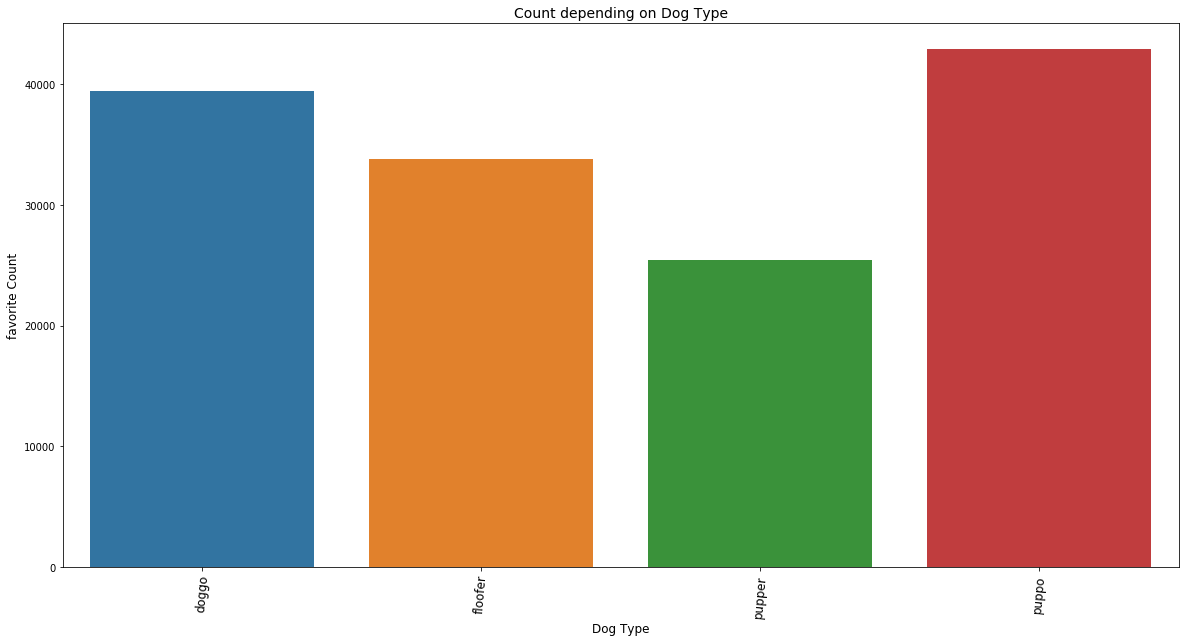

In [112]:
plt.figure(figsize=(20,10))

ax=sns.barplot(x=fav_df["dog_stage"], y=master_df["favorite_count"])
plt.ylabel('favorite Count',fontsize=12)
plt.xlabel('Dog Type',fontsize=12)
plt.title('Count depending on Dog Type',fontsize=14)
plt.xticks(rotation=85,fontsize=12);
plt.savefig('Count vs Dog Type')

### Insight 2

In [113]:
#creating a new column for month 
master_df['timestamp']=pd.to_datetime(master_df['timestamp'])

In [115]:
master_df.head()

,tweet_id,rating_numerator_x,rating_denominator_x,dog_stage,favorite_count,retweet_count,timestamp,source,text,dog_type
0,892420643555336193,13,10,doggo,39467.0,8853.0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,
1,892177421306343426,13,10,doggo,33819.0,6514.0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,
2,891815181378084864,12,10,doggo,25461.0,4328.0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,
3,891689557279858688,13,10,doggo,42908.0,8964.0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,
4,891327558926688256,12,10,doggo,41048.0,9774.0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,


In [116]:
#extracting just the months
months=[dates.strftime('%B') for dates in master_df['timestamp']]

In [118]:
master_df['month']=months

In [119]:
master_df.head()

,tweet_id,rating_numerator_x,rating_denominator_x,dog_stage,favorite_count,retweet_count,timestamp,source,text,dog_type,month
0,892420643555336193,13,10,doggo,39467.0,8853.0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,,August
1,892177421306343426,13,10,doggo,33819.0,6514.0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,,August
2,891815181378084864,12,10,doggo,25461.0,4328.0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,,July
3,891689557279858688,13,10,doggo,42908.0,8964.0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,,July
4,891327558926688256,12,10,doggo,41048.0,9774.0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,,July


In [120]:
month_df=master_df.groupby('month',as_index=False)[['dog_stage','favorite_count','retweet_count']].mean()

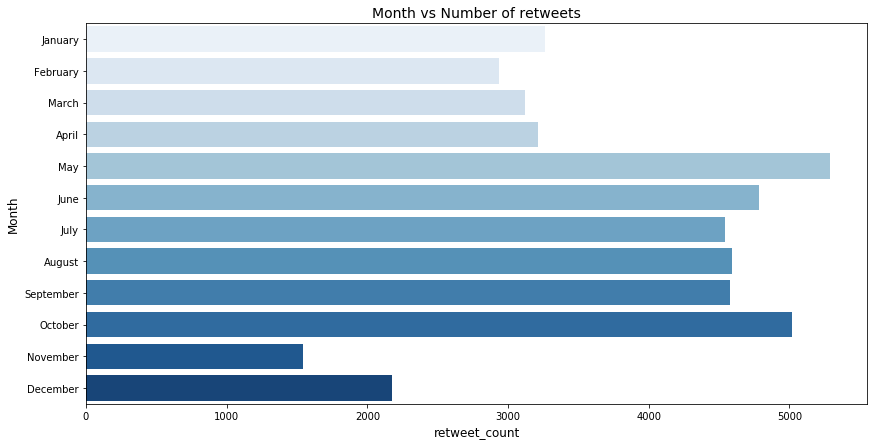

In [122]:
plt.figure(figsize=(14,7))
ax=sns.barplot(y=month_df['month'], x=month_df['retweet_count'],palette='Blues',
              order=['January','February','March','April','May','June','July','August','September',
                    'October','November','December'])
plt.ylabel('Month',fontsize=12)
plt.xlabel('retweet_count',fontsize=12)
plt.title('Month vs Number of retweets',fontsize=14)
plt.savefig('Month vs retweets.png')

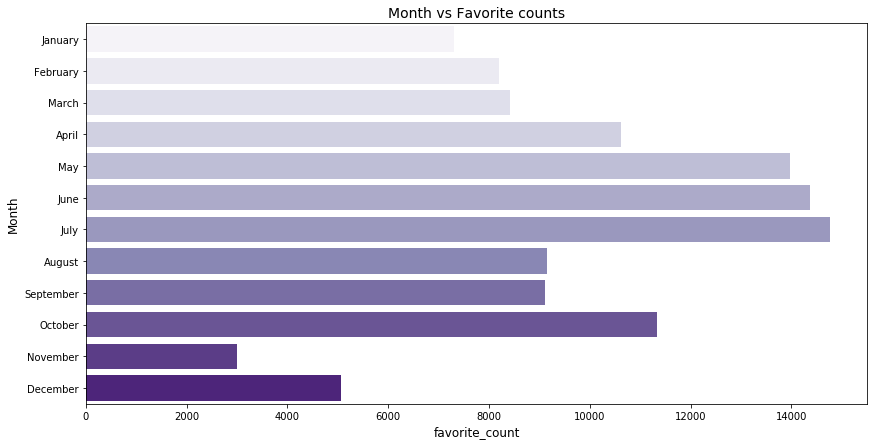

In [125]:
plt.figure(figsize=(14,7))
ax=sns.barplot(y=month_df['month'], x=month_df['favorite_count'],palette='Purples',
              order=['January','February','March','April','May','June','July','August','September',
                    'October','November','December'])
plt.ylabel('Month',fontsize=12)
plt.xlabel('favorite_count',fontsize=12)
plt.title('Month vs Favorite counts',fontsize=14)
plt.savefig('Month vs favorites.png')

### Insights

    1.Doggo and puppo have the most count
    2.May and October have the most number of retweets
    3.May,June and July have the highest number of favorite counts
